# **Importing dataset**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraelwakeel","key":"93b2848a2349dde938aae7fa85a10f81"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d aymenmouffok/arabic-letters-images-created-by-masters-students


Dataset URL: https://www.kaggle.com/datasets/aymenmouffok/arabic-letters-images-created-by-masters-students
License(s): CC0-1.0
 69% 41.0M/59.3M [00:00<00:00, 110MB/s]
100% 59.3M/59.3M [00:00<00:00, 131MB/s]


In [ ]:
!unzip arabic-letters-images-created-by-masters-students.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/alphabet/ش/ch197.png  
  inflating: dataset/alphabet/ش/ch198.png  
  inflating: dataset/alphabet/ش/ch199.png  
  inflating: dataset/alphabet/ش/ch2.png  
  inflating: dataset/alphabet/ش/ch20.png  
  inflating: dataset/alphabet/ش/ch200.png  
  inflating: dataset/alphabet/ش/ch201.jpg  
  inflating: dataset/alphabet/ش/ch202.jpg  
  inflating: dataset/alphabet/ش/ch203.jpg  
  inflating: dataset/alphabet/ش/ch204.jpg  
  inflating: dataset/alphabet/ش/ch205.jpg  
  inflating: dataset/alphabet/ش/ch206.jpg  
  inflating: dataset/alphabet/ش/ch207.jpg  
  inflating: dataset/alphabet/ش/ch208.jpg  
  inflating: dataset/alphabet/ش/ch209.jpg  
  inflating: dataset/alphabet/ش/ch21.png  
  inflating: dataset/alphabet/ش/ch210.jpg  
  inflating: dataset/alphabet/ش/ch211.jpg  
  inflating: dataset/alphabet/ش/ch212.jpg  
  inflating: dataset/alphabet/ش/ch213.jpg  
  inflating: dataset/alphabet/ش/ch214.jpg  
  inflating: dataset/alphabet

In [ ]:
import os

dataset_path = "dataset"
for root, dirs, files in os.walk(dataset_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")


Root: dataset
Directories: ['alphabet']
Files: []
Root: dataset/alphabet
Directories: ['م', 'ط', 'د', 'ه', 'و', 'ج', 'ب', 'خ', 'ظ', 'ل', 'ك', 'ش', 'ق', 'ز', 'غ', 'ن', 'أ', 'ت', 'ض', 'ف', 'ص', 'ر', 'ي', 'ث', 'ع', 'ح', 'س', 'ذ']
Files: []
Root: dataset/alphabet/م
Directories: []
Files: ['m322.jpg', 'm173.png', 'm410.jpg', 'm248.png', 'm396.jpg', 'm316.jpg', 'm158.png', 'm366.jpg', 'm247.png', 'm294.png', 'm7.png', 'm43.png', 'm345.jpg', 'm166.png', 'm268.png', 'm50.png', 'm375.jpg', 'm31.png', 'm32.png', 'm15.png', 'm198.png', 'm24.png', 'm197.png', 'm42.png', 'm393.jpg', 'm255.png', 'm264.png', 'm305.jpg', 'm169.png', 'm270.png', 'm21.png', 'm406.jpg', 'm208.png', 'm380.jpg', 'm364.jpg', 'm293.png', 'm392.jpg', 'm223.png', 'm336.jpg', 'm230.png', 'm353.jpg', 'm167.png', 'm286.png', 'm329.jpg', 'm22.png', 'm401.jpg', 'm39.png', 'm26.png', 'm385.jpg', 'm232.png', 'm179.png', 'm189.png', 'm325.jpg', 'm236.png', 'm256.png', 'm283.png', 'm211.png', 'm252.png', 'm383.jpg', 'm212.png', 'm326.

# ***Importing Library***

In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# **Image preprocessing**

In [ ]:
# Image preprocessing
image_size = (32, 32)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, image_size)
    img = img / 255.0  # Normalize pixel values
    return img


In [ ]:

dataset_path='/content/dataset/alphabet'


In [ ]:
import random

# Load and preprocess images and labels
images = []
labels = []
class_names = sorted(os.listdir(dataset_path))  # Get class names from folder names
for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Check for image extensions
            img_path = os.path.join(class_dir, filename)
            try:
              img = preprocess_image(img_path)
              images.append(img)
              labels.append(class_names.index(class_name))
            except Exception as e:
              print(f"Error processing image {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)



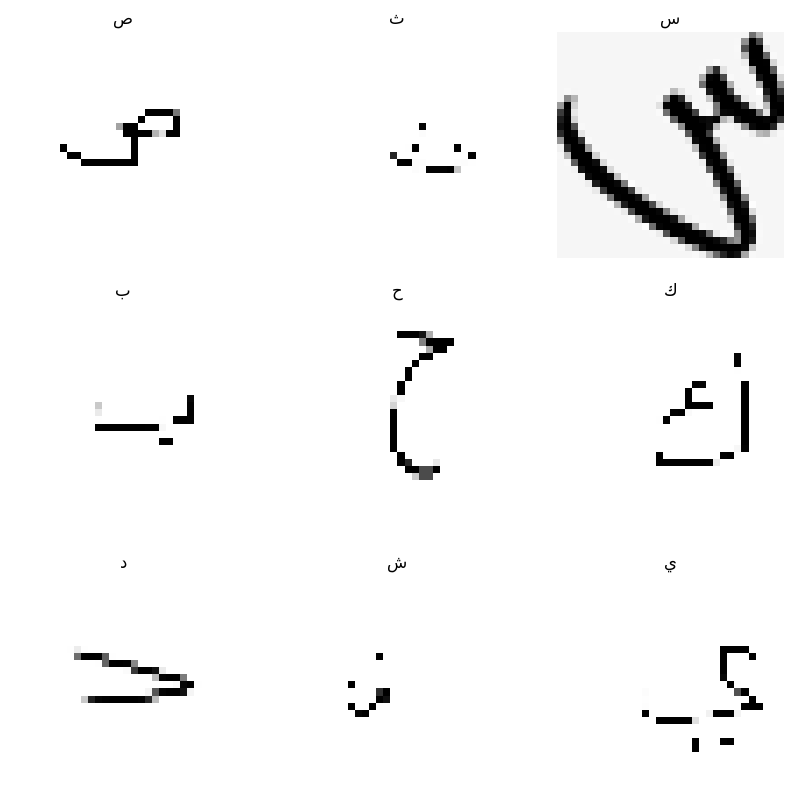

In [ ]:
# Display a few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    idx = random.randint(0, len(images) - 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(class_names[labels[idx]])
    plt.axis("off")
plt.show()



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)


In [ ]:
# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer with number of classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)



Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.1269 - loss: 3.0110 - val_accuracy: 0.4971 - val_loss: 1.5528
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5572 - loss: 1.3769 - val_accuracy: 0.6490 - val_loss: 1.0178
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6890 - loss: 0.8861 - val_accuracy: 0.7192 - val_loss: 0.8105
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7794 - loss: 0.6442 - val_accuracy: 0.7579 - val_loss: 0.6915
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8337 - loss: 0.4817 - val_accuracy: 0.7865 - val_loss: 0.6364
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8609 - loss: 0.3937 - val_accuracy: 0.7736 - val_loss: 0.6230
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8776 - loss: 0.3343 - val_accuracy: 0.8138 - val_loss: 0.5628
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9123 - loss: 0.2514 - val

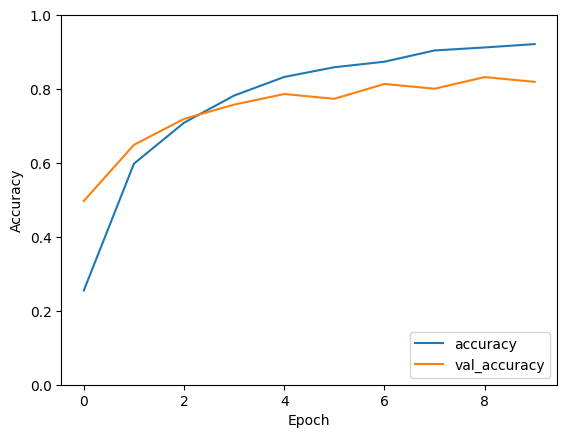

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

55/55 - 1s - 10ms/step - accuracy: 0.8383 - loss: 0.4850

Test accuracy: 0.838302731513977


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.1,  # Apply shear transformations
    zoom_range=0.1,  # Zoom in or out by up to 10%
    horizontal_flip=False,  # Flip images horizontally (if applicable)
    fill_mode='nearest'  # Fill any gaps created by transformations with the nearest pixel
)

In [ ]:
datagen.fit(X_train.reshape(-1, 32, 32, 1))  # Fit the data generator to your training data


In [ ]:
# Create the CNN model with regularization and dropout
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=30,  # Potentially increase epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.0674 - loss: 3.4442 - val_accuracy: 0.3326 - val_loss: 2.3825
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.2847 - loss: 2.5011 - val_accuracy: 0.4862 - val_loss: 1.6581
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.4271 - loss: 1.9498 - val_accuracy: 0.5774 - val_loss: 1.3649
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4887 - loss: 1.7117 - val_accuracy: 0.6147 - val_loss: 1.2339
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.5119 - loss: 1.5606 - val_accuracy: 0.6302 - val_loss: 1.1338
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5459 - loss: 1.4721 - val_accuracy: 0.6720 - val_loss: 1.0198
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.5633 - loss: 1.3816 - val_accuracy: 0.6898 - val_loss: 0.9744
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.5941 - loss: 1.2857 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

55/55 - 1s - 13ms/step - accuracy: 0.7884 - loss: 0.6786

Test accuracy: 0.7884174585342407
